In [1]:
import urllib.request
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from math import sqrt
import matplotlib.pyplot as plot
import pandas as pd

In [2]:
# Lectura de los datos
loc=r"winequality-red.csv"
data= pd.read_csv(loc,sep=";",)
names=list(data.columns.values)
label=list(data["quality"])
Xlist=(data.drop("quality",1))
Xlist=[Xlist.iloc[i] for i in range(len(Xlist))]

In [3]:
# Normalización de columnas en X y etiquetas
nrows= len(Xlist)
ncols=len(Xlist[0])

# Medias y varianzas
xMeans=[]
xSD=[]
for i in range(ncols):
    col=[Xlist[j][i] for j in range(nrows)]
    mean=sum(col)/nrows
    xMeans.append(mean)
    colDiff= [(Xlist[j][i]-mean) for j in range(nrows)]
    sumSq=sum([colDiff[i]**2 for i in range(nrows)])
    stdDev= sqrt(sumSq/nrows)
    xSD.append(stdDev)

# Uso de la media y desviación para normalizar
xNormalized=[]
for i in range(nrows):
    rowNormalized=[(Xlist[i][j]-xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)

# Normalización de las etiquetas
meanLabel=sum(label)/nrows
sdLabel=sqrt(sum([(label[i]-meanLabel)**2 for i in range(nrows)])/nrows)

labelNormalized=[(label[i]-meanLabel)/sdLabel for i in range(nrows)]

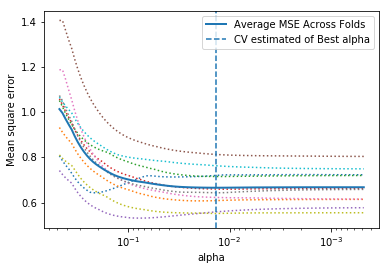

In [4]:
# convertir las listas en arrays
y=np.array(labelNormalized)
X= np.array(xNormalized)

wineModel=LassoCV(cv=10).fit(X,y)

plot.figure()
plot.plot(wineModel.alphas_, wineModel.mse_path_,":")
plot.plot(wineModel.alphas_, wineModel.mse_path_.mean(axis=-1), label="Average MSE Across Folds",linewidth=2)
plot.axvline(wineModel.alpha_, linestyle="--", label="CV estimated of Best alpha")
plot.semilogx()
plot.legend()
ax= plot.gca()
ax.invert_xaxis()
plot.xlabel("alpha")
plot.ylabel("Mean square error")
plot.axis("tight")
plot.show()

In [5]:
len(wineModel.mse_path_)

100

In [6]:
print("El valor de alpha que minimiza el error CV es: ", wineModel.alpha_)
print("Minímo MSE:", min(wineModel.mse_path_.mean(axis=-1)))

El valor de alpha que minimiza el error CV es:  0.013561387700964642
Minímo MSE: 0.6655849206002855
